In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import json
import re
from pathlib import Path
from mimas.helper.fileio import NumpyEncoder

import seaborn as sns
from matplotlib import rcParams
matplotlib_font_size = 12
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = matplotlib_font_size
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['svg.fonttype'] = 'none'

path_data = Path().cwd().parent / 'data'

path_figures = Path().cwd().parent / 'figures'
path_figures.mkdir(parents=True, exist_ok=True)


In [2]:
datasource = "mona"
path_result_name="benchmark_different_entropy"

all_df = []
for file_data in (path_data/datasource/path_result_name).glob("charge_*-100_against_1000000.csv"):
    df = pd.read_csv(file_data)
    df['path'] = file_data.parent.stem
    df['file'] = file_data.stem
    all_df.append(df)

df = pd.concat(all_df)

df["charge"] = df["file"].str.extract(r"charge_(..?)-")
df["library_size"] = df["file"].str.extract(r"against_(.+)$").astype(int)

df

,entropy,spec_id,time,library_size,path,file,charge
0,1,0,0.001393,1000000,benchmark_different_entropy,charge_P-100_against_1000000,P
1,1,1,0.001312,1000000,benchmark_different_entropy,charge_P-100_against_1000000,P
2,1,2,0.000361,1000000,benchmark_different_entropy,charge_P-100_against_1000000,P
3,1,3,0.000209,1000000,benchmark_different_entropy,charge_P-100_against_1000000,P
4,1,4,0.001291,1000000,benchmark_different_entropy,charge_P-100_against_1000000,P
...,...,...,...,...,...,...,...
395,4,95,0.002576,1000000,benchmark_different_entropy,charge_N-100_against_1000000,N
396,4,96,0.002058,1000000,benchmark_different_entropy,charge_N-100_against_1000000,N
397,4,97,0.002400,1000000,benchmark_different_entropy,charge_N-100_against_1000000,N
398,4,98,0.002549,1000000,benchmark_different_entropy,charge_N-100_against_1000000,N


In [3]:
df_data = df[["entropy", "charge", "spec_id", "time"]]
df["entropy"] = df["entropy"].astype(int)
df_data


,entropy,charge,spec_id,time
0,1,P,0,0.001393
1,1,P,1,0.001312
2,1,P,2,0.000361
3,1,P,3,0.000209
4,1,P,4,0.001291
...,...,...,...,...
395,4,N,95,0.002576
396,4,N,96,0.002058
397,4,N,97,0.002400
398,4,N,98,0.002549


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


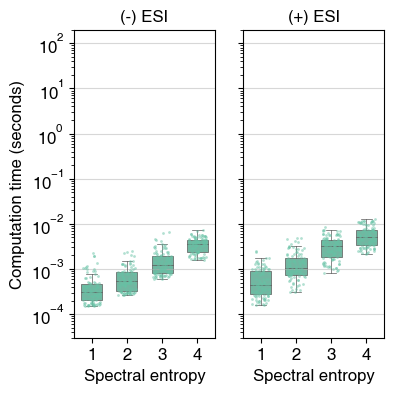

In [4]:
df_plot = df_data
color_palette_set2 = sns.color_palette("Set2", 4)
color_palette = {
    "native_entropy_search": color_palette_set2[1],
    "matchms": color_palette_set2[3],
    "blink": color_palette_set2[2],
    "fast_entropy_search": color_palette_set2[0],
}

charge_table = {0: "N", 1: "P"}
fig, axes = plt.subplots(1, 2, figsize=(4, 4),
                         sharex=True, sharey=True)
for i, ax in enumerate(axes):
    df_plot_cur = df_plot[df_plot["charge"] == charge_table[i]]

    sns.stripplot(data=df_plot_cur, x="entropy", y="time", ax=ax, color=color_palette["fast_entropy_search"],
                  dodge=False, jitter=0.25, size=2, alpha=0.5, linewidth=0, legend=False)
    sns.boxplot(data=df_plot_cur, x="entropy", y="time", ax=ax, color=color_palette["fast_entropy_search"],
                linewidth=0.5, fliersize=0, dodge=False, width=0.6)

    ax.legend().remove()
    ax.grid(True, which="major", axis="y", ls="-", alpha=0.5)

    # Set title
    title={"N": "(-) ESI", "P": "(+) ESI"}[charge_table[i]]
    ax.set_title(title, fontsize=matplotlib_font_size)

    # Set y-axis to log scale
    ax.set_yscale("log")
    ax.set_ylim(3e-5, 200)
    ax.set_xlabel("Spectral entropy")

    if i==0:
        ax.set_ylabel("Computation time (seconds)")
    else:
        ax.set_ylabel("")

plt.savefig(path_figures / f"60_compare_different_query_entropy-{datasource}.svg", bbox_inches='tight', pad_inches=0.1)